In [1]:
import pandas as pd
from utils.createCSV import createCSV
from matplotlib import pyplot as plt
from utils.dataloader import CustomImageDataset
import torchvision.transforms as transforms
from torchvision.io import read_image
from PIL import Image
import torch
from torchvision.transforms.autoaugment import AutoAugmentPolicy
from torch.utils.data import Dataset, DataLoader
import cv2
from utils.transformations import CustomTransformations

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/tmp/ipykernel_181/2351071234.py:19: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3277.)
  img = (transformed_image.T).detach().numpy()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.8044, -1.8044,  ..., -1

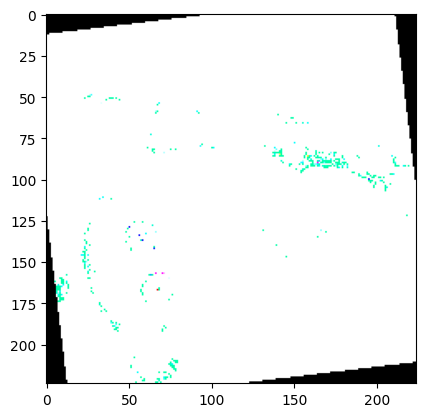

In [2]:
#PRUEBA DE UNA IMAGEN
#image = Image.open('../test/H0001.jpg')
# image = Image.open('../test/tarsero.jpg')
image = read_image("../test/tarsero.jpg").float()
transform = transforms

# Definir la media y la desviación estándar que se utilizarán en la normalización
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Crear una instancia de la clase CustomTransformations
custom_transforms = CustomTransformations(mean, std)

# Aplicar la transformación a la imagen
transformed_image = custom_transforms(image)
print(transformed_image)


img = (transformed_image.T).detach().numpy()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


torch.Size([2, 3, 244, 244])
torch.Size([2, 3])
Feature batch shape: torch.Size([2, 3, 244, 244])
Labels batch shape: torch.Size([2, 3])


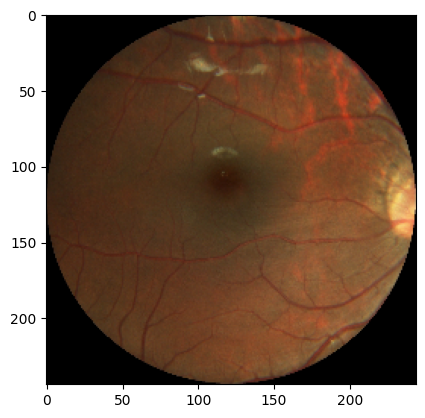

In [58]:
train_transforms = transforms.Compose([
    transforms.Resize((244,244)),
    transforms.RandomVerticalFlip(),
    transforms.RandomHorizontalFlip(),
    # transforms.RandomRotation(30),
    transforms.RandomChoice([
                             # transforms.CenterCrop(480),
                             transforms.RandomRotation(20),
                             transforms.RandomCrop((244,244)),
                             # transforms.ColorJitter(brightness=0.8, contrast=0.1, saturation=0.4, hue=0.4)
                            ]),
    
    # transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    
])

# train_transforms = transforms

dataset = CustomImageDataset(annotations_file = "./output.csv", img_dir = "../test/", num_clases=3, transform = train_transforms, target_transform=None)
dl = DataLoader(dataset,batch_size=2,shuffle=False)


for image, label in dl:
    print(image.shape)
    print(label.shape)
    break
    
train_features, train_labels = next(iter(dl))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0]
img = img.permute(1,2,0).type(torch.uint8)
plt.imshow(img)
plt.show()
#img.T: Esta operación transpone la imagen, lo que significa que los ejes de filas y columnas se intercambian.
#.detach(): Este método se utiliza para desasociar un tensor de PyTorch de su gráfico de computación y devolver un numpy array, que es más fácil de manejar para algunas operaciones.
#.numpy(): Este método convierte un tensor de PyTorch en un array de numpy.
#cv2.cvtColor de OpenCV para cambiar su formato de BGR a RGB. Este cambio es necesario porque la mayoría de las funciones de visualización en Python, incluyendo plt.imshow de Matplotlib, esperan que la imagen esté en formato RGB en lugar de BGR.




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Feature batch shape: torch.Size([2, 3, 224, 224])
Labels batch shape: torch.Size([2, 3])


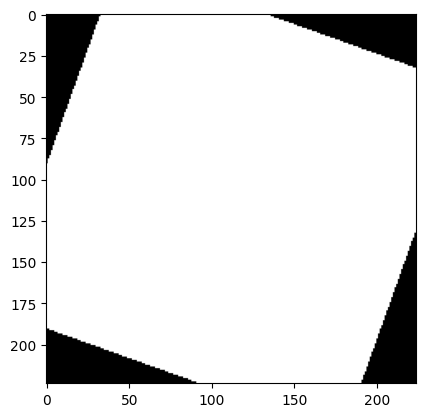

In [44]:
train_transforms = CustomTransformations(mean=(0.485, 0.456, 0.406) , std=(0.229, 0.224, 0.225))
dataset = CustomImageDataset(annotations_file = "./output.csv", img_dir = "../test/", num_clases=3, transform = train_transforms, target_transform=None)

dl = DataLoader(dataset,batch_size=2,shuffle=True)

train_features, train_labels = next(iter(dl))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
img = (img.T).numpy()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

